<a href="https://colab.research.google.com/github/CarolKSD/CarolKSD/blob/main/Desafio_Suzano_Caroline_Dalmazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando Bibliotecas para o desafio:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

### Importação dos dados:

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dados de Treino:

In [18]:
train = pd.read_csv('/content/drive/My Drive/Desafio Suzano/PM_train.txt', sep=" ", header=None)

In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [20]:
#Colocando os nomes das Features
train.drop(train.columns[[26,27]], axis=1, inplace=True)
train.columns = ['Asset_Id', 'Runtime', 'Setting1', 'Setting2', 'Setting3', 'Tag1', 'Tag2', 'Tag3',
                     'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 'Tag14',
                     'Tag15', 'Tag16', 'Tag17', 'Tag18', 'Tag19', 'Tag20', 'Tag21']

In [21]:
train.head()

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Dados de Teste:

In [22]:
test = pd.read_csv('/content/drive/My Drive/Desafio Suzano/PM_test.txt', sep=" ", header=None)
test.drop(test.columns[[26, 27]], axis=1, inplace=True)
test.columns = ['Asset_Id', 'Runtime', 'Setting1', 'Setting2', 'Setting3', 'Tag1', 'Tag2', 'Tag3',
                     'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 'Tag14',
                     'Tag15', 'Tag16', 'Tag17', 'Tag18', 'Tag19', 'Tag20', 'Tag21']

In [23]:
test.head()

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


### Análise dos Dados:

In [24]:
#Ver se há dados faltantes
train.isnull().sum()

Asset_Id    0
Runtime     0
Setting1    0
Setting2    0
Setting3    0
Tag1        0
Tag2        0
Tag3        0
Tag4        0
Tag5        0
Tag6        0
Tag7        0
Tag8        0
Tag9        0
Tag10       0
Tag11       0
Tag12       0
Tag13       0
Tag14       0
Tag15       0
Tag16       0
Tag17       0
Tag18       0
Tag19       0
Tag20       0
Tag21       0
dtype: int64

In [25]:
test.isnull().sum()

Asset_Id    0
Runtime     0
Setting1    0
Setting2    0
Setting3    0
Tag1        0
Tag2        0
Tag3        0
Tag4        0
Tag5        0
Tag6        0
Tag7        0
Tag8        0
Tag9        0
Tag10       0
Tag11       0
Tag12       0
Tag13       0
Tag14       0
Tag15       0
Tag16       0
Tag17       0
Tag18       0
Tag19       0
Tag20       0
Tag21       0
dtype: int64

In [27]:
# Qual é o ciclo total de cada Asset de Treino?
max_cycle = train.groupby('Asset_Id')['Runtime'].max().values
max_cycle

array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
       180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
       156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
       188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
       195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
       202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231,
       199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135,
       341, 155, 258, 283, 336, 202, 156, 185, 200])

In [28]:
# Colocando o RUL no dataset de treino
col_target = 'RUL'
train[col_target] = max_cycle[train['Asset_Id']-1] - train['Runtime']
train.head(192)

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


In [29]:
#Descrição geral dos dados de Treino:
train.describe()

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [30]:
#Descrição geral dos dados de Teste:
test.describe()

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.559627,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


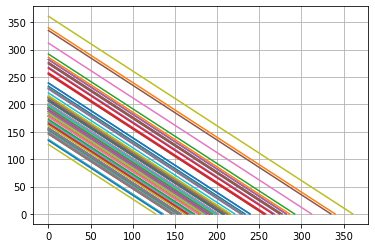

In [32]:
#Vida util de cada Asset no grafico:
one_asset = []
for i,r in train.iterrows():
    rul = r['RUL']
    one_asset.append(rul)
    if rul == 0:
        plt.plot(one_asset)
        one_asset = []
        
plt.grid()

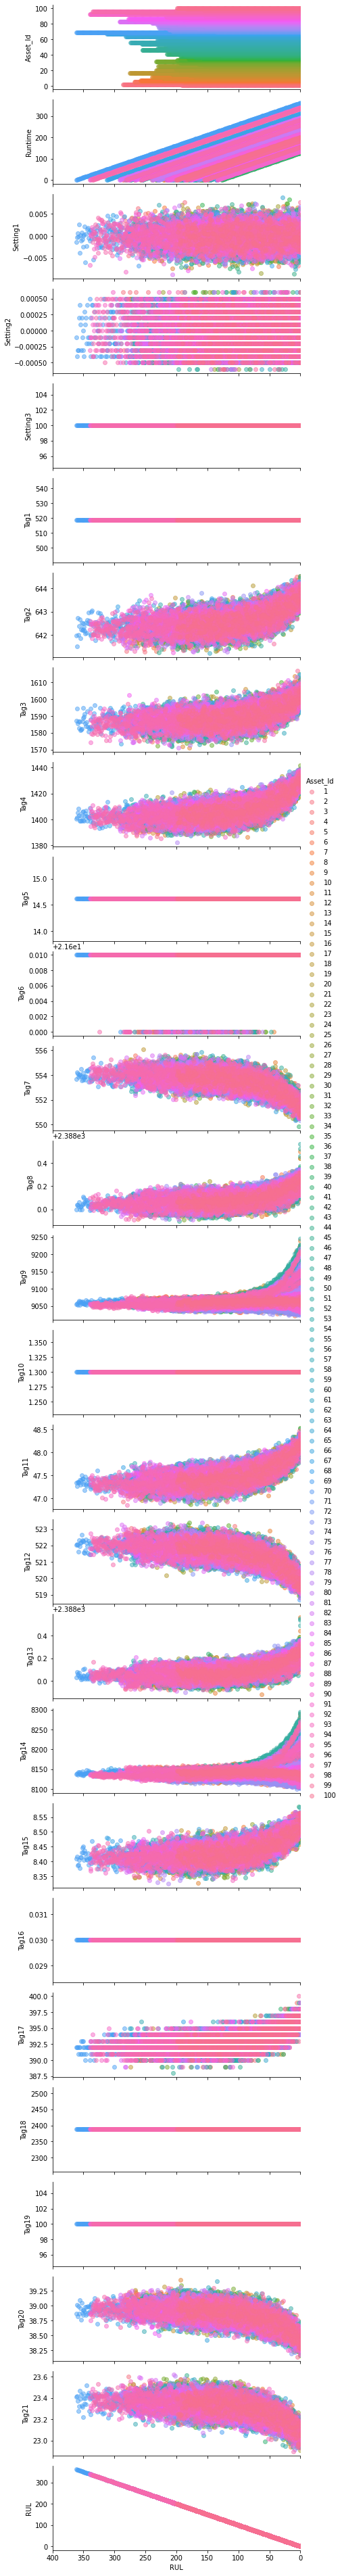

In [36]:
#Como cada Feature se relaciona com o Target?
explore = sns.PairGrid(data=train.query('Asset_Id < 101') ,
                 x_vars=col_target,
                 y_vars=train.columns,
                 hue="Asset_Id", height=2, aspect=3)
explore = explore.map(plt.scatter, alpha=0.5)
explore = explore.set(xlim=(400,0))
explore = explore.add_legend()

### Processamento dos Dados para o Modelo:

In [38]:
#Determinando quais Features tem somente valores constantes
cols_const = [ col for col in train.columns if len(train[col].unique()) <= 2 ]
print('Colunas com valores Constantes: \n' + str(cols_const) + '\n')

Colunas com valores Constantes: 
['Setting3', 'Tag1', 'Tag5', 'Tag6', 'Tag10', 'Tag16', 'Tag18', 'Tag19']



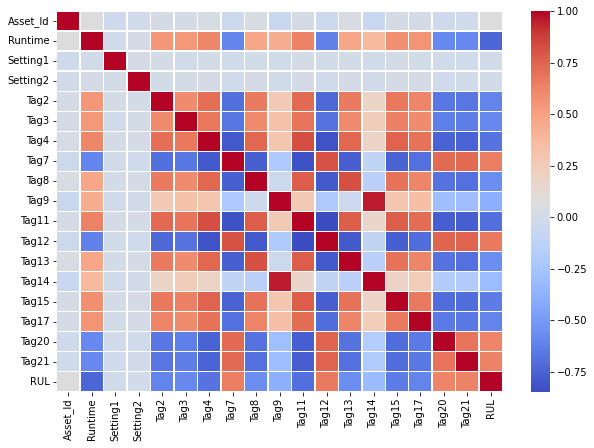

In [39]:
#Verificando a correlação entre as Features (sem contar com as colunas constantes):
train_corr = train[[x for x in train.columns if x not in cols_const]].corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_corr, linewidths=.5, cmap='coolwarm')

Os sensores 9 e 14 são fortemente correlacionados;
Os sensores 4 e 11, 7 e 12, 8 e 13 também possuem forte correlação.

In [40]:
# Verificando as colunas mais correlacionadas
THRESHOLD = 0.8
train_corr = train.corr(method='pearson')
df_corr = pd.DataFrame(np.tril(train_corr.values), columns=train_corr.columns, index = train_corr.index)

correlating = []
for col in [x for x in df_corr.columns if x not in cols_const]:
    ser = df_corr[col]
    idx = np.logical_or(-THRESHOLD > ser,  ser > THRESHOLD)
    for i, c in zip(ser[idx].index, ser[idx].values):
        if (i, col, c) not in correlating and i != col:
            correlating.append((col, i, c))

print('Medidas com correlação alta:')
for c in correlating:
    print(f'{c[0]} x {c[1]} : {c[2]}')

Medidas com correlação alta:
Tag4 x Tag11 : 0.8301356963159815
Tag4 x Tag12 : -0.815590516105214
Tag7 x Tag11 : -0.8228050249957691
Tag7 x Tag12 : 0.812712601325414
Tag8 x Tag13 : 0.8260843322333569
Tag9 x Tag14 : 0.9631566003059776
Tag11 x Tag12 : -0.8468835930051095


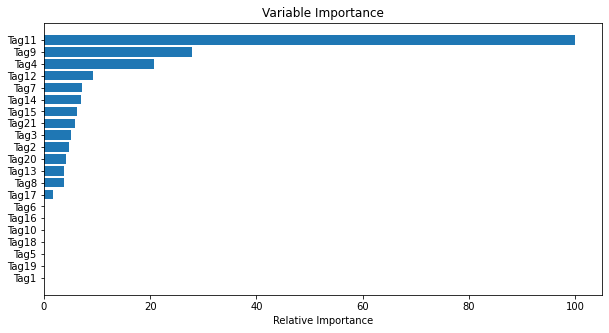

In [41]:
# Determinando as colunas mais importantes com Random Forest:
from sklearn import ensemble

rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)

# pegar somente as colunas tag:
cols_tag = ['Tag'+str(i) for i in range(1, 22)]
aux_cols = [x for x in cols_tag]

# treina o modelo
X_train = train[aux_cols]
y_train = train[col_target]
rf.fit(X_train, y_train)

# Plota as feature importances
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 50:]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Os sensores 6, 16, 10, 18, 5, 19 e 1 não são importantes para o modelo, coincidentemente são as colunas que possuem somente valores constantes, então vamos retirar eles do dataset.

In [42]:
cols_not_important = ['Tag1', 'Tag19', 'Tag5', 'Tag18', 'Tag10', 'Tag16', 'Tag6', 'Setting3']

In [43]:
train.drop(cols_not_important, axis=1, inplace=True)

In [44]:
train.head()

,Asset_Id,Runtime,Setting1,Setting2,Tag2,Tag3,Tag4,Tag7,Tag8,Tag9,Tag11,Tag12,Tag13,Tag14,Tag15,Tag17,Tag20,Tag21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


### Regressão Linear Múltipla:

In [47]:
#Determinando as features para compor a regressão linear:
lr_vars = ["Runtime", "Tag11", "Tag9", "Tag4", "Tag14", "Tag12", "Tag7", "Tag15", "Tag21", "Tag3", "Tag2", "Tag20", "Tag13", "Tag8", "Tag17"]
formula ="RUL ~ " + ' + '.join(lr_vars)
print('formula: ', formula)

# Criando o modelo de regressão linear
model = smf.ols(formula = formula, data = train).fit()

# Plotando o sumario do modelo
print(model.summary())

formula:  RUL ~ Runtime + Tag11 + Tag9 + Tag4 + Tag14 + Tag12 + Tag7 + Tag15 + Tag21 + Tag3 + Tag2 + Tag20 + Tag13 + Tag8 + Tag17
                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2614.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:58   Log-Likelihood:            -1.0560e+05
No. Observations:               20631   AIC:                         2.112e+05
Df Residuals:                   20615   BIC:                         2.114e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [50]:
#Tirando as features que são fortemente correlacionadas:
lr_vars2 = ["Runtime", "Tag11", "Tag9", "Tag12", "Tag15", "Tag21", "Tag3", "Tag2", "Tag20", "Tag8", "Tag17"]
formula2 ="RUL ~ " + ' + '.join(lr_vars2)
print('formula: ', formula2)

# Criando o modelo de regressão linear
model2 = smf.ols(formula = formula2, data = train).fit()

# Plotando o sumario do modelo
print(model2.summary())

formula:  RUL ~ Runtime + Tag11 + Tag9 + Tag12 + Tag15 + Tag21 + Tag3 + Tag2 + Tag20 + Tag8 + Tag17
                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3535.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:56:30   Log-Likelihood:            -1.0566e+05
No. Observations:               20631   AIC:                         2.113e+05
Df Residuals:                   20619   BIC:                         2.114e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [53]:
#Verificando a multicolinearidade das variaveis através do VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(train[lr_vars2].values, i) for i in range(train[lr_vars2].shape[1])]
vif_df = pd.DataFrame({'vif': vif[0:]}, index=train[lr_vars2].columns)

def highlight_max(s):
  is_max = s > 10
  return ['background-color: orange' if v else '' for v in is_max]

vif_df.style.apply(highlight_max)

,vif
Runtime,7.266243
Tag11,169963.701966
Tag9,227475.429392
Tag12,2352771.909380
Tag15,160500.799472
Tag21,138812.631067
Tag3,151110.250787
Tag2,4267167.675839
Tag20,136018.226809
Tag8,8345779.604627


In [93]:
lr_vars3 = ["Runtime", "Tag11", "Tag9", "Tag21", "Tag20", "Tag17"]
formula3 ="RUL ~ " + ' + '.join(lr_vars3)
print('formula: ', formula3)

# Criando o modelo de regressão linear
model3 = smf.ols(formula = formula3, data = train).fit()

# Plotando o sumario do modelo
print(model3.summary())

formula:  RUL ~ Runtime + Tag11 + Tag9 + Tag21 + Tag20 + Tag17
                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     6272.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:19:46   Log-Likelihood:            -1.0588e+05
No. Observations:               20631   AIC:                         2.118e+05
Df Residuals:                   20624   BIC:                         2.118e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

O  **R2**  ajustado nos dá uma medida de porcentagem da variância explicada pelo modelo. Este modelo tem um **poder explicativo de 65%**, ou seja, **as variáveis explicam 65% do RUL**.

A estatística de teste F e seu p-valor nos mostram que **esse modelo é estatisticamente válido**.

Pelos valores p (P >|t|), **todos os coeficientes são estatisticamente significativos**.

Durbin-Watson:
O resultado sempre estará entre 0 e 4, no qual quanto mais próximo de 0, mais evidências de correlação positiva e quanto mais próximo de 4, mais evidências de correlação negativa.
Sendo assim, para este caso, **o resultado do teste aponta evidências de correlação positiva**, o que sugere possibilidade do nosso modelo não ter sido configurado muito bem. Devemos olhar caso a caso, mas uma possibilidade seria avaliar modelos alternativos.

In [94]:
vif = [variance_inflation_factor(train[lr_vars3].values, i) for i in range(train[lr_vars3].shape[1])]
vif_df = pd.DataFrame({'vif': vif[0:]}, index=train[lr_vars3].columns)

def highlight_max(s):
  is_max = s > 10
  return ['background-color: orange' if v else '' for v in is_max]

vif_df.style.apply(highlight_max)

,vif
Runtime,6.845199
Tag11,81714.897929
Tag9,163005.488827
Tag21,91675.191975
Tag20,92201.071520
Tag17,133894.660284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


,Runtime,Tag11,Tag9,Tag21,Tag20,Tag17
Runtime,1.000000,0.634385,0.443999,-0.585923,-0.583597,0.566995
Tag11,0.634385,1.000000,0.274591,-0.772554,-0.771510,0.722296
Tag9,0.443999,0.274591,1.000000,-0.292795,-0.285280,0.337110
Tag21,-0.585923,-0.772554,-0.292795,1.000000,0.693480,-0.658710
Tag20,-0.583597,-0.771510,-0.285280,0.693480,1.000000,-0.651021
Tag17,0.566995,0.722296,0.337110,-0.658710,-0.651021,1.000000


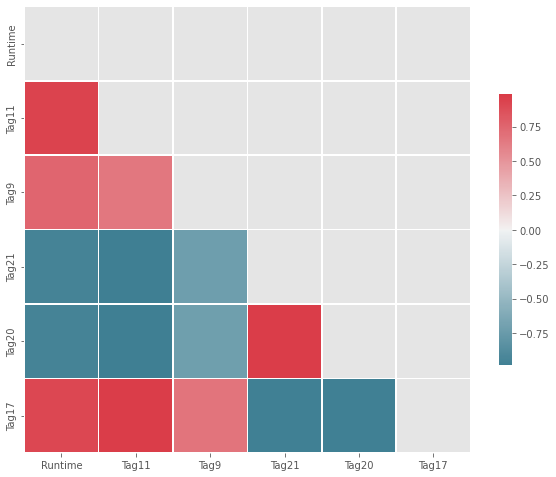

In [95]:
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=size)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_matrix = train[lr_vars3].corr()
plot_corr_matrix(train[lr_vars3].corr(), (10, 10))
corr_matrix

Visualização dos resíduos do modelo

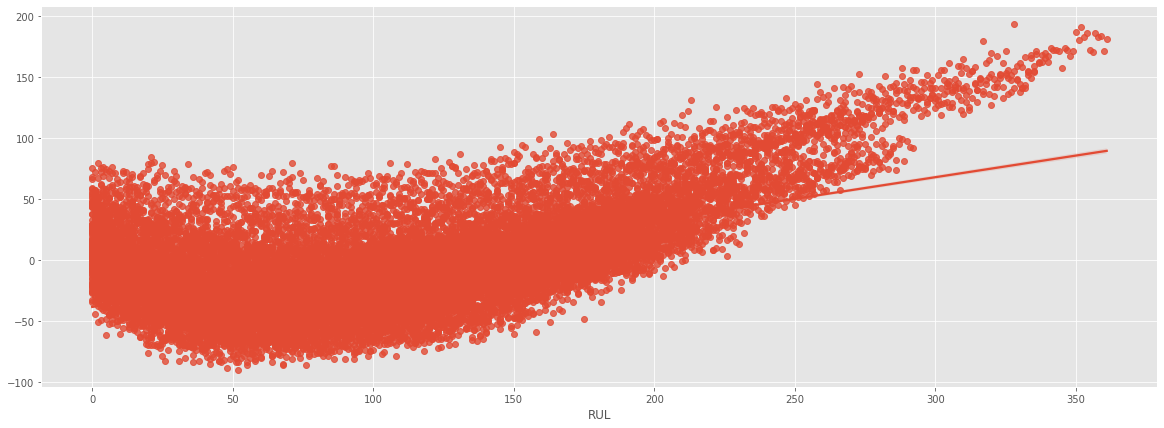

In [104]:
fig, ax = plt.subplots(1,figsize=(20,7))

sns.regplot(x=train.RUL , y=model3.resid)

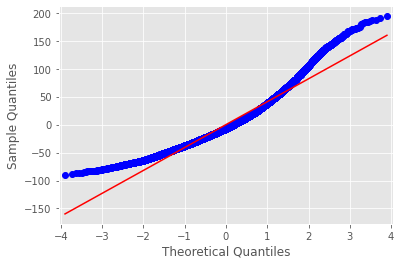

In [107]:
sm.qqplot(model3.resid, line="s");

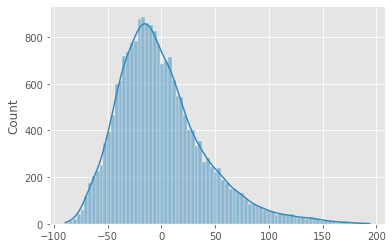

In [108]:
sns.histplot(model3.resid, kde=True)

Prevendo os valores RUL para os dados de teste:

In [99]:
test['RUL']= model.predict(test)
test.describe()

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,137.588141
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120,37.354781
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,-25.550760
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,115.842463
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,143.861316
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,165.024176
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,219.468562


In [87]:
test.head(193)

,Asset_Id,Runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,181.974612
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,188.928747
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,174.508180
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,180.460203
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,187.414715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,3,109,-0.0001,0.0004,100.0,518.67,643.29,1593.51,1411.08,14.62,...,2388.14,8131.90,8.4593,0.03,394,2388,100.0,38.71,23.2187,97.890275
189,3,110,-0.0008,-0.0000,100.0,518.67,642.60,1582.46,1409.54,14.62,...,2388.16,8125.34,8.4713,0.03,394,2388,100.0,38.88,23.2921,106.697366
190,3,111,-0.0038,-0.0002,100.0,518.67,643.02,1589.99,1419.21,14.62,...,2388.13,8130.51,8.4788,0.03,393,2388,100.0,38.97,23.2875,92.985536
191,3,112,0.0006,0.0004,100.0,518.67,643.35,1592.61,1416.75,14.62,...,2388.14,8122.26,8.4778,0.03,393,2388,100.0,38.61,23.3559,88.697643


In [110]:
#Vida útil restante prevista de cada Asset
max_cycle_pred = test.groupby('Asset_Id')['RUL'].max()
max_cycle_pred.round(0)

Asset_Id
1      189.0
2      171.0
3      168.0
4      170.0
5      174.0
       ...  
96     197.0
97     199.0
98     178.0
99     209.0
100    195.0
Name: RUL, Length: 100, dtype: float64

In [113]:
pred = pd.DataFrame(max_cycle_pred)
pred.to_csv("PredRUL.csv")

Text(0.5, 1.0, 'RUL: DatasetTreino vs Predictions')

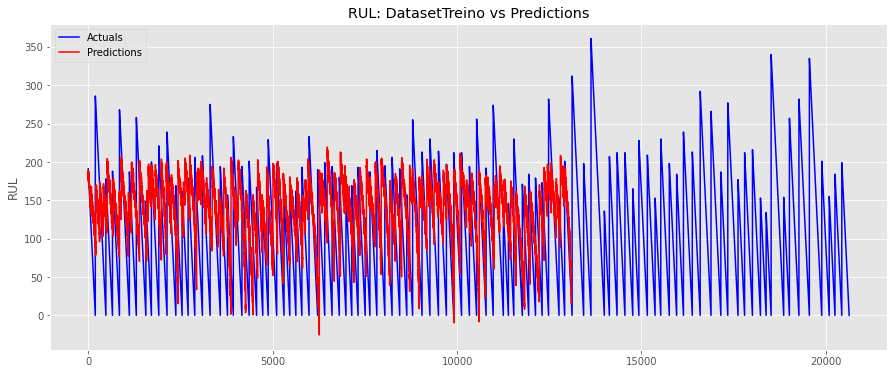

In [111]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=train['RUL'].index,y=train['RUL'],label='Actuals',color='blue',ax=ax)
sns.lineplot(x=test['RUL'].index,y=test['RUL'],label='Predictions',color='red',ax=ax)
ax.set_title('RUL: DatasetTreino vs Predictions')

Podemos ver no gráfico a linha azul que representa o RUL real e a linha vermelha que representa o RUL previsto para os dados de teste. Dá para observar que temos dados um pouco dispersos, o que não faz o nosso modelo performar tão bem. Podemos melhorá-lo utilizando modelos mais robustos e alternativos.